    Ben Christensen
    Math 345
    9/26/17

In [1]:
from random import random
import numpy as np
from matplotlib import pyplot as plt
from time import time

In [14]:
# Problem 1
def stretch(A, a, b):
    """Scale the points in 'A' by 'a' in the x direction and 'b' in the
    y direction.

    Parameters:
        A ((2,n) ndarray): Array containing points in R2 stored as columns.
        a (float): scaling factor in the x direction.
        b (float): scaling factor in the y direction.
    """
    return np.array([ [a, 0], [0, b] ]) @ A

def shear(A, a, b):
    """Slant the points in 'A' by 'a' in the x direction and 'b' in the
    y direction.

    Parameters:
        A ((2,n) ndarray): Array containing points in R2 stored as columns.
        a (float): scaling factor in the x direction.
        b (float): scaling factor in the y direction.
    """
    return np.array([ [1, a], [b, 1] ]) @ A

def reflect(A, a, b):
    """Reflect the points in 'A' about the line that passes through the origin
    and the point (a,b).

    Parameters:
        A ((2,n) ndarray): Array containing points in R2 stored as columns.
        a (float): x-coordinate of a point on the reflecting line.
        b (float): y-coordinate of the same point on the reflecting line.
    """
    return (1 / (a**2 + b**2)) * np.array([ [a**2 - b**2, 2*a*b], [2*a*b, b**2 - a**2] ]) @ A

def rotate(A, theta):
    """Rotate the points in 'A' about the origin by 'theta' radians.

    Parameters:
        A ((2,n) ndarray): Array containing points in R2 stored as columns.
        theta (float): The rotation angle in radians.
    """
    return np.array([ [np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)] ]) @ A


def test_transformation(A, B):
    """Test each linear transformation function by plotting the original
    matrix against the transformed matrix.

    Parameters:
        A ((2, n) ndarray): Original array containing points in R2 as columns
        B ((2, n) ndarray): Transformed array
    """
    plt.subplot(121)
    plt.plot(A[0], A[1])
    plt.axis([-1, 1, -1, 1])

    plt.subplot(122)
    plt.plot(B[0], B[1])
    plt.axis([-1, 1, -1, 1])

    plt.show()


# Problem 2
def solar_system(T, omega_e, omega_m):
    """Plot the trajectories of the earth and moon over the time interval [0,T]
    assuming the initial position of the earth is (10,0) and the initial
    position of the moon is (11,0).

    Parameters:
        T (int): The final time.
        omega_e (float): The earth's angular velocity.
        omega_m (float): The moon's angular velocity.
    """
    t = np.linspace(0, T, 100)
    earth_positions = rotate(np.array([10, 0]), t[0]*omega_e)
    moon_positions = rotate(np.array([11, 0]), t[0]*omega_m)
    earth_to_moon = moon_positions - earth_positions
    relative_moon = rotate(earth_to_moon, t[0]*omega_m)
    #np.array([ [np.cos(t[0]*omega_m), -np.sin(t[0]*omega_m)], [np.sin(t[0]*omega_m), np.cos(t[0]*omega_m)] ]) @ (np.array([11, 0]) - np.array([10, 0]))
    #moon_positions = moon_positions + earth_positions

    for i in range(1, len(t)):
        earth_positions = np.vstack((earth_positions, rotate(np.array([10, 0]), t[i]*omega_e)))
        relative_moon = np.vstack((relative_moon, rotate(earth_to_moon, t[i]*omega_m)))
        moon_positions = np.vstack((moon_positions, relative_moon[i] + earth_positions[i]))


    plt.subplot(111)
    plt.plot(earth_positions[:, 0], earth_positions[:, 1], label="Earth")
    plt.plot(moon_positions[:, 0], moon_positions[:, 1], label="Moon")
    plt.title("The Earth and moon's orbit around the sun")
    plt.legend()
    plt.gca().set_aspect("equal")
    plt.show()




def random_vector(n):
    """Generate a random vector of length n as a list."""
    return [random() for i in range(n)]

def random_matrix(n):
    """Generate a random nxn matrix as a list of lists."""
    return [[random() for j in range(n)] for i in range(n)]

def matrix_vector_product(A, x):
    """Compute the matrix-vector product Ax as a list."""
    m, n = len(A), len(x)
    return [sum([A[i][k] * x[k] for k in range(n)]) for i in range(m)]

def matrix_matrix_product(A, B):
    """Compute the matrix-matrix product AB as a list of lists."""
    m, n, p = len(A), len(B), len(B[0])
    return [[sum([A[i][k] * B[k][j] for k in range(n)])
                                    for j in range(p) ]
                                    for i in range(m) ]

# Problem 3
def Time_Functions(domain):
    vectorTimes, matrixTimes = [], []
    for n in domain:
        if n == 0:
            vectorTimes.append(0)
            matrixTimes.append(0)
        else:
            x = random_vector(n)
            A = random_matrix(n)
            B = random_matrix(n)

            vectorStartTime = time()
            matrix_vector_product(A, x)
            vectorTimes.append(time() - vectorStartTime)

            A = random_matrix(n)
            matrixStartTime = time()
            matrix_matrix_product(A, B)
            matrixTimes.append(time() - matrixStartTime)
    return vectorTimes, matrixTimes

def Time_NP_Dot(domain):
    vectorTimes, matrixTimes = [], []
    for n in domain:
        if n == 0:
            vectorTimes.append(0)
            matrixTimes.append(0)
        else:
            x = np.array(random_vector(n))
            A = np.array(random_matrix(n))
            B = np.array(random_matrix(n))

            vectorStartTime = time()
            x @ A
            vectorTimes.append(time() - vectorStartTime)

            matrixStartTime = time()
            A @ B
            matrixTimes.append(time() - matrixStartTime)
    return vectorTimes, matrixTimes

def prob3():
    """Use time.time(), timeit.timeit(), or %timeit to time
    matrix_vector_product() and matrix-matrix-mult() with increasingly large
    inputs. Generate the inputs A, x, and B with random_matrix() and
    random_vector() (so each input will be nxn or nx1).
    Only time the multiplication functions, not the generating functions.

    Report your findings in a single figure with two subplots: one with matrix-
    vector times, and one with matrix-matrix times. Choose a domain for n so
    that your figure accurately describes the growth, but avoid values of n
    that lead to execution times of more than 1 minute.
    """
    domain = np.arange(0, 300, 50)
    vectorTimes, matrixTimes = Time_Functions(domain)

    plt.subplot(121)
    plt.plot(domain, vectorTimes, 'b.-')
    plt.xlabel("n", fontsize=14)
    plt.ylabel("Seconds", fontsize=14)
    plt.title("Matrix-Vector Multiplication")
    plt.subplot(122)
    plt.plot(domain, matrixTimes, '.-', color='orange')
    plt.xlabel("n", fontsize=14)
    plt.title("Matrix-Matrix Multiplication")
    plt.show()




# Problem 4
def prob4():
    """Time matrix_vector_product(), matrix_matrix_product(), and np.dot().

    Report your findings in a single figure with two subplots: one with all
    four sets of execution times on a regular linear scale, and one with all
    four sets of exections times on a log-log scale.
    """
    domain = np.arange(0, 300, 50)
    funVectors, funMatrices = Time_Functions(domain)
    NPVectors, NPMatrices = Time_NP_Dot(domain)

    plt.subplot(121)
    plt.plot(domain, funMatrices, label="Matrix-Matrix List")
    plt.plot(domain, funVectors, label="Matrix-Vector List")
    plt.plot(domain, NPMatrices, label="Matrix-Matrix Numpy")
    plt.plot(domain, NPVectors, label="Matrix-Vector Numpy")
    plt.legend(loc="upper left")

    ax2 = plt.subplot(122)
    ax2.loglog(domain, funMatrices, basex=2, basey=2, lw=2, label="Matrix-Matrix List")
    ax2.loglog(domain, funVectors, basex=2, basey=2, lw=2, label="Matrix-Vector List")
    ax2.loglog(domain, NPMatrices, basex=2, basey=2, lw=2, label="Matrix-Matrix Numpy")
    ax2.loglog(domain, NPVectors, basex=2, basey=2, lw=2, label="Matrix-Vector Numpy")
    plt.legend(loc="upper left")
    plt.show()


The random 2x4 matrix is [[ 0.6106717   0.25026425  0.85329776  0.92482859]
 [ 0.08517516  0.96309556  0.32145553  0.96368749]]
Stretch transformation on A


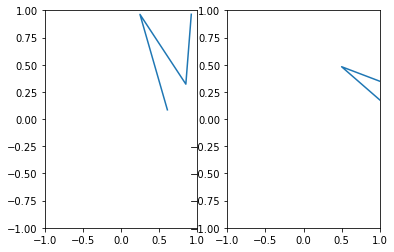

[[ 1.22134339  0.5005285   1.70659552  1.84965718]
 [ 0.04258758  0.48154778  0.16072776  0.48184374]]
Shear transformation on A


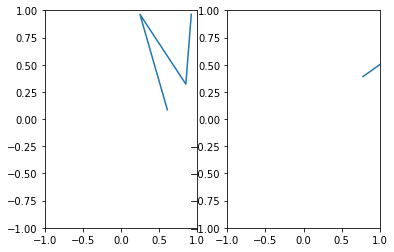

[[ 0.78102201  2.17645536  1.49620881  2.85220357]
 [ 0.390511    1.08822768  0.74810441  1.42610178]]
Reflection transformation on A


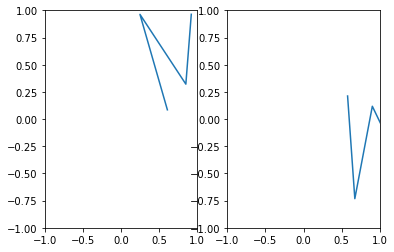

[[ 0.57891039  0.67404284  0.90418298  1.26952522]
 [ 0.21222037 -0.73201879  0.11791466 -0.41509904]]
Rotation transformation on A


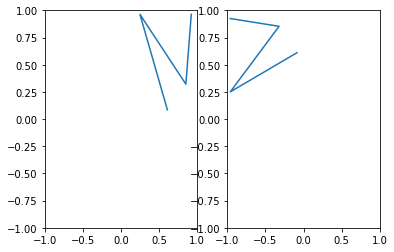

[[-0.08517516 -0.96309556 -0.32145553 -0.96368749]
 [ 0.6106717   0.25026425  0.85329776  0.92482859]]


In [15]:
A = np.random.rand(2,4)
a, b, theta = 2, 1/2, np.pi/2
new_matrices = [stretch(A, a, b), shear(A, a, b), reflect(A, a, b), rotate(A, theta)]
names = ["Stretch", "Shear", "Reflection", "Rotation"]
print("The random 2x4 matrix is", A)
for i, B in enumerate(new_matrices):
    print(names[i], "transformation on A")
    test_transformation(A, B)
    print(B)

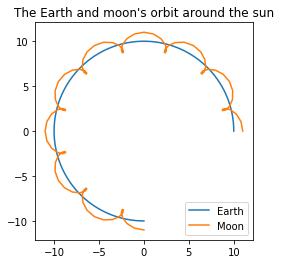

In [16]:
T, omega_e, omega_m = 3*np.pi/2, 1, 13
solar_system(T, omega_e, omega_m)

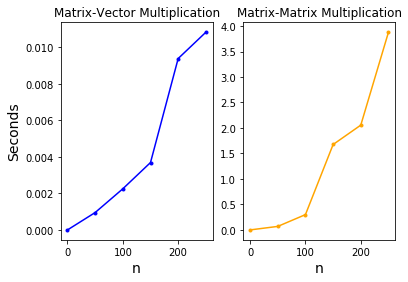

In [17]:
prob3()

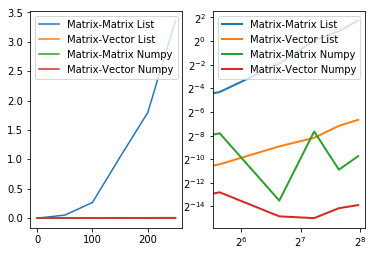

In [18]:
prob4()